In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [238]:
hallmark_res = pd.read_csv("limma-hallmark-results.csv")

In [239]:
hallmark_res.drop("Unnamed: 0", axis=1, inplace=True)
hallmark_res.set_index("pathway", inplace=True) # make the pathway the index
hallmark_res.head(5)

,Untreated sg1 vs Untreated Control,Untreated sg9 vs Untreated Control,Nutlin Control vs Untreated Control,Nutlin sg1 vs Untreated Control,Nutlin sg9 vs Untreated Control,Untreated sg9 vs Untreated sg1,Nutlin Control vs Untreated sg1,Nutlin sg1 vs Untreated sg1,Nutlin sg9 vs Untreated sg1,Nutlin Control vs Untreated sg9,Nutlin sg1 vs Untreated sg9,Nutlin sg9 vs Untreated sg9,Nutlin sg1 vs Nutlin Control,Nutlin sg9 vs Nutlin Control,Nutlin sg9 vs Nutlin sg1
pathway,,,,,,,,,,,,,,,
ADIPOGENESIS,-1.233071,-1.363584,1.616445,0.765388,-1.313084,1.084352,1.523384,1.205481,0.982968,1.535673,0.950538,-0.891050,-1.601394,-1.550721,-1.202295
ALLOGRAFT REJECTION,-1.094665,1.906259,1.354268,1.525132,1.669044,1.634298,1.343122,1.453947,1.521272,1.027514,-1.003127,-1.096583,-1.036094,-1.114019,-0.913537
ANDROGEN RESPONSE,-1.251309,-0.936182,1.083848,-1.315501,-1.445941,1.232469,1.162547,0.821118,0.858872,0.989966,-1.300868,-1.244135,-1.329806,-1.142512,0.974820
ANGIOGENESIS,-1.509199,-1.356046,1.639419,-1.231264,-1.346752,1.370051,1.679805,1.384935,1.339240,1.648369,1.073359,0.674280,-1.639989,-1.670747,-1.057132
APICAL JUNCTION,-1.029246,-0.974074,1.700587,1.067917,-1.168019,0.877241,1.612935,1.188506,-0.992191,1.745889,1.198102,-1.153719,-1.663681,-1.755685,-1.463722


In [353]:
hallmark_res.head(10)

,Untreated sg1 vs Untreated Control,Untreated sg9 vs Untreated Control,Nutlin Control vs Untreated Control,Nutlin sg1 vs Untreated Control,Nutlin sg9 vs Untreated Control,Untreated sg9 vs Untreated sg1,Nutlin Control vs Untreated sg1,Nutlin sg1 vs Untreated sg1,Nutlin sg9 vs Untreated sg1,Nutlin Control vs Untreated sg9,Nutlin sg1 vs Untreated sg9,Nutlin sg9 vs Untreated sg9,Nutlin sg1 vs Nutlin Control,Nutlin sg9 vs Nutlin Control,Nutlin sg9 vs Nutlin sg1
pathway,,,,,,,,,,,,,,,
ADIPOGENESIS,-1.233071,-1.363584,1.616445,0.765388,-1.313084,1.084352,1.523384,1.205481,0.982968,1.535673,0.950538,-0.891050,-1.601394,-1.550721,-1.202295
ALLOGRAFT REJECTION,-1.094665,1.906259,1.354268,1.525132,1.669044,1.634298,1.343122,1.453947,1.521272,1.027514,-1.003127,-1.096583,-1.036094,-1.114019,-0.913537
ANDROGEN RESPONSE,-1.251309,-0.936182,1.083848,-1.315501,-1.445941,1.232469,1.162547,0.821118,0.858872,0.989966,-1.300868,-1.244135,-1.329806,-1.142512,0.974820
ANGIOGENESIS,-1.509199,-1.356046,1.639419,-1.231264,-1.346752,1.370051,1.679805,1.384935,1.339240,1.648369,1.073359,0.674280,-1.639989,-1.670747,-1.057132
APICAL JUNCTION,-1.029246,-0.974074,1.700587,1.067917,-1.168019,0.877241,1.612935,1.188506,-0.992191,1.745889,1.198102,-1.153719,-1.663681,-1.755685,-1.463722
APICAL SURFACE,-1.054274,-1.303532,1.524944,-0.967430,-1.481694,-0.884935,1.576659,1.115476,-0.876725,1.569524,1.215724,0.794782,-1.635959,-1.648315,-1.142959
APOPTOSIS,-1.043034,1.130992,1.480106,1.136615,0.959556,-1.013909,1.358817,1.243499,-1.010692,1.411331,1.139269,-1.028384,-1.286040,-1.442282,-1.182560
BILE ACID METABOLISM,-1.258380,-1.438316,1.685456,-1.131451,-1.400669,-1.045028,1.630767,1.061525,-0.995913,1.687085,1.225998,-1.004208,-1.771895,-1.714233,-1.205032
CHOLESTEROL HOMEOSTASIS,-1.454889,-0.754856,1.706749,-1.061251,-0.782376,1.551317,1.705258,1.311348,1.365476,1.646593,0.822333,0.663396,-1.663931,-1.622146,-0.845496


In [291]:
headers = list(hallmark_res)
sample_names = set(itertools.chain.from_iterable([i.split(' vs ') for i in headers]))

In [292]:
sample_names

{'Nutlin Control',
 'Nutlin sg1',
 'Nutlin sg9',
 'Untreated Control',
 'Untreated sg1',
 'Untreated sg9'}

In [293]:
list(hallmark_res)

['Untreated sg1 vs Untreated Control',
 'Untreated sg9 vs Untreated Control',
 'Nutlin Control vs Untreated Control',
 'Nutlin sg1 vs Untreated Control',
 'Nutlin sg9 vs Untreated Control',
 'Untreated sg9 vs Untreated sg1',
 'Nutlin Control vs Untreated sg1',
 'Nutlin sg1 vs Untreated sg1',
 'Nutlin sg9 vs Untreated sg1',
 'Nutlin Control vs Untreated sg9',
 'Nutlin sg1 vs Untreated sg9',
 'Nutlin sg9 vs Untreated sg9',
 'Nutlin sg1 vs Nutlin Control',
 'Nutlin sg9 vs Nutlin Control',
 'Nutlin sg9 vs Nutlin sg1']

In [294]:
# True means "is enriched"
def create_comparison_dict(headers):
    comp = {}

    # Iterate through columns (ie GSEA results)
    for header in headers:
        samples = header.split(' vs ')
        sample_one = samples[0]
        sample_two = samples[1]

        if sample_one not in comp:
            comp[sample_one] = {}
        if sample_two not in comp:
            comp[sample_two] = {}

        if row[header] > 0:
            # If NES is positive, the first element is more enriched than the second
            comp[sample_one][sample_two] = True
            comp[sample_two][sample_one] = False
        if row[header] < 0:
             # If NES is negative, the first element is less enriched than the second
            comp[sample_two][sample_one] = True
            comp[sample_one][sample_two] = False

    return comp

In [295]:
# Create a comparison dictionary
all_comps = dict.fromkeys(hallmark_res.index, None)

# Iterate through rows (ie pathways)
for index, row in hallmark_res.iterrows():
    all_comps[index] = create_comparison_dict(list(hallmark_res))


In [296]:
all_comps

{'ADIPOGENESIS': {'Untreated sg1': {'Untreated Control': False,
   'Untreated sg9': False,
   'Nutlin Control': False,
   'Nutlin sg1': False,
   'Nutlin sg9': False},
  'Untreated Control': {'Untreated sg1': True,
   'Untreated sg9': True,
   'Nutlin Control': False,
   'Nutlin sg1': False,
   'Nutlin sg9': True},
  'Untreated sg9': {'Untreated Control': False,
   'Untreated sg1': True,
   'Nutlin Control': False,
   'Nutlin sg1': False,
   'Nutlin sg9': True},
  'Nutlin Control': {'Untreated Control': True,
   'Untreated sg1': True,
   'Untreated sg9': True,
   'Nutlin sg1': True,
   'Nutlin sg9': True},
  'Nutlin sg1': {'Untreated Control': True,
   'Untreated sg1': True,
   'Untreated sg9': True,
   'Nutlin Control': False,
   'Nutlin sg9': True},
  'Nutlin sg9': {'Untreated Control': False,
   'Untreated sg1': True,
   'Untreated sg9': False,
   'Nutlin Control': False,
   'Nutlin sg1': False}},
 'ALLOGRAFT REJECTION': {'Untreated sg1': {'Untreated Control': False,
   'Untreated s

In [302]:
def isGreaterThan(pathway, sample_one, sample_two):
    return all_comps[pathway][sample_one][sample_two]

#['Untreated sg1','Untreated sg9','Nutlin sg9','Nutlin sg1','Untreated Control','Nutlin Control']
def insertionSort(pathway):
    arr = list(sample_names)
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and isGreaterThan(pathway, arr[j], key):
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

ordered_samples_by_pathway = dict.fromkeys(hallmark_res.index, None)
for key in ordered_samples_by_pathway.keys():
    ordered_samples_by_pathway[key] = insertionSort(key)

In [309]:
ordered_idx_by_pathway = dict.fromkeys(hallmark_res.index, {})
for pathway, ordered_samples in ordered_samples_by_pathway.items():
    idx_map = {}
    for index, value in enumerate(ordered_samples):
        idx_map[value] = index
    ordered_idx_by_pathway[pathway] = idx_map
ordered_idx_by_pathway 

{'ADIPOGENESIS': {'Untreated sg1': 0,
  'Nutlin sg9': 1,
  'Untreated sg9': 2,
  'Untreated Control': 3,
  'Nutlin sg1': 4,
  'Nutlin Control': 5},
 'ALLOGRAFT REJECTION': {'Untreated sg1': 0,
  'Untreated Control': 1,
  'Nutlin sg9': 2,
  'Nutlin sg1': 3,
  'Untreated sg9': 4,
  'Nutlin Control': 5},
 'ANDROGEN RESPONSE': {'Untreated sg1': 0,
  'Nutlin sg1': 1,
  'Nutlin sg9': 2,
  'Untreated sg9': 3,
  'Untreated Control': 4,
  'Nutlin Control': 5},
 'ANGIOGENESIS': {'Untreated sg1': 0,
  'Untreated sg9': 1,
  'Nutlin sg9': 2,
  'Nutlin sg1': 3,
  'Untreated Control': 4,
  'Nutlin Control': 5},
 'APICAL JUNCTION': {'Nutlin sg9': 0,
  'Untreated sg1': 1,
  'Untreated sg9': 2,
  'Untreated Control': 3,
  'Nutlin sg1': 4,
  'Nutlin Control': 5},
 'APICAL SURFACE': {'Untreated sg9': 0,
  'Nutlin sg9': 1,
  'Untreated sg1': 2,
  'Nutlin sg1': 3,
  'Untreated Control': 4,
  'Nutlin Control': 5},
 'APOPTOSIS': {'Untreated Control': 0,
  'Nutlin sg9': 1,
  'Untreated sg9': 2,
  'Untreated sg

In [310]:
ordered_pathways_df = pd.DataFrame.from_dict(ordered_idx_by_pathway, orient='index')
ordered_pathways_df.reset_index(inplace=True)
ordered_pathways_df.rename(columns={"index": "Pathway"}, inplace=True)

In [311]:
ordered_pathways_df.head(5)

,Pathway,Untreated sg1,Nutlin sg9,Untreated sg9,Untreated Control,Nutlin sg1,Nutlin Control
0,ADIPOGENESIS,0,1,2,3,4,5
1,ALLOGRAFT REJECTION,0,2,4,1,3,5
2,ANDROGEN RESPONSE,0,2,3,4,1,5
3,ANGIOGENESIS,0,2,1,4,3,5
4,APICAL JUNCTION,1,0,2,3,4,5


In [312]:
ordered_pathways_df_melted = ordered_pathways_df.melt("Pathway", var_name='Sample', value_name='vals')
ordered_pathways_df_melted.head(5)

,Pathway,Sample,vals
0,ADIPOGENESIS,Untreated sg1,0
1,ALLOGRAFT REJECTION,Untreated sg1,0
2,ANDROGEN RESPONSE,Untreated sg1,0
3,ANGIOGENESIS,Untreated sg1,0
4,APICAL JUNCTION,Untreated sg1,1


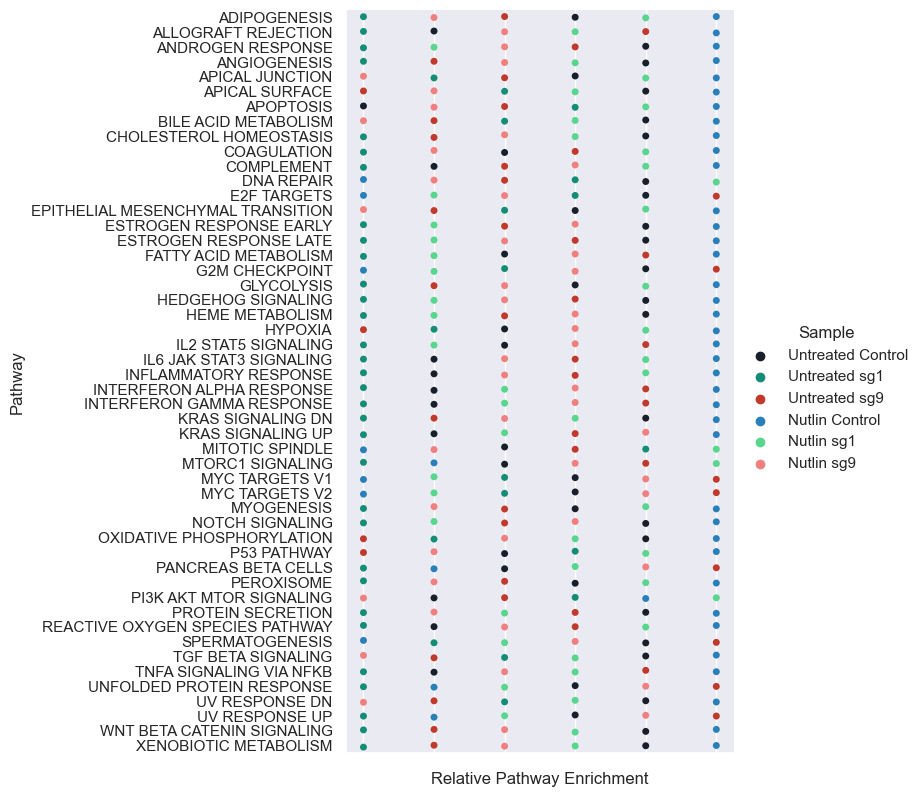

In [327]:
hue_order = ['Untreated Control', 'Untreated sg1', 'Untreated sg9', 
             'Nutlin Control', 'Nutlin sg1', 'Nutlin sg9']
palette = {"Untreated Control": "#17202A", 
          "Untreated sg1": "#138D75", 
          "Untreated sg9": "#C0392B", 
          "Nutlin Control": "#2980B9",
          "Nutlin sg1": "#58D68D",
          "Nutlin sg9": "#F08080"}
ax = sns.catplot(data=ordered_pathways_df_melted, y="Pathway", x="vals", hue='Sample', hue_order=hue_order,
           height=8.27, palette=palette)
ax.set(xlabel="Relative Pathway Enrichment")
ax.set(xticklabels=[])

plt.savefig("Figures/gsea-number-line.png")
plt.show()

In [351]:
def number_line_plot(df, size=5):
    # height=8.27, 
    ax = sns.catplot(data=df, y="Pathway", x="vals", hue='Sample', hue_order=hue_order,
           palette=palette, kind="swarm", size=size)
    ax.set(xlabel="Relative Pathway Enrichment")
    ax.set(xticklabels=[])

    # plt.savefig("Figures/gsea-number-line.png")
    plt.show()

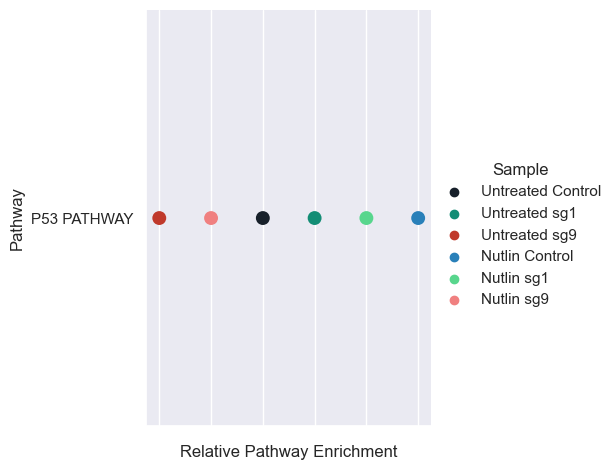

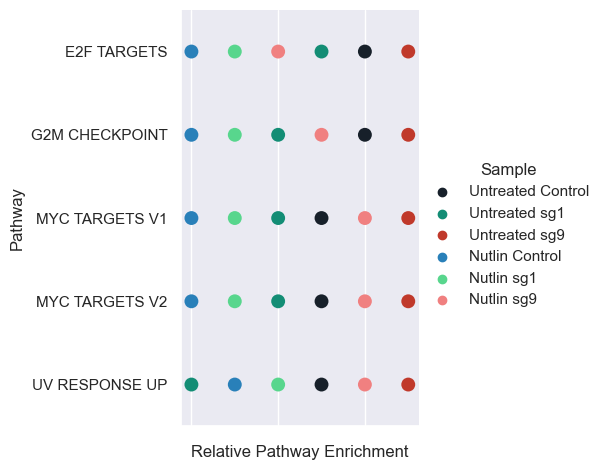

In [352]:
subset_df = ordered_pathways_df_melted.loc[ordered_pathways_df_melted['Pathway'].isin(["MYC TARGETS V1", 
                                                               "MYC TARGETS V2", "UV RESPONSE UP",
                                                               "G2M CHECKPOINT", "E2F TARGETS"])]
p53_df = ordered_pathways_df_melted.loc[ordered_pathways_df_melted['Pathway'].isin(["P53 PATHWAY"])]
number_line_plot(p53_df, size=10)
number_line_plot(subset_df, size=10)

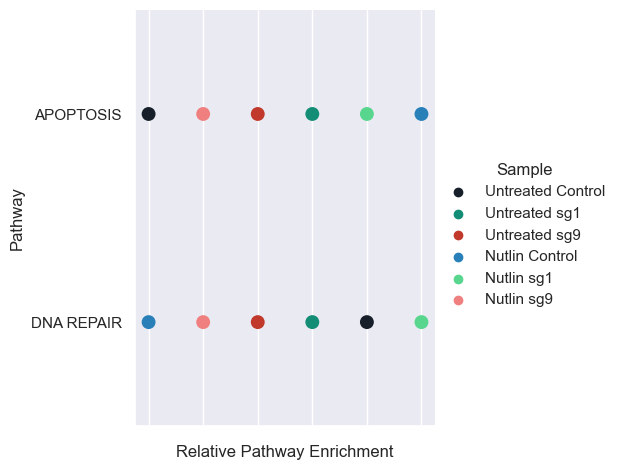

In [354]:
interesting_df = ordered_pathways_df_melted.loc[ordered_pathways_df_melted['Pathway'].isin(["APOPTOSIS", 
                                                               "DNA REPAIR"])]
number_line_plot(interesting_df, size=10)